In [16]:

class Point2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        return
        
    def __add__(self, p2):
        x = self.x + p2.x
        y = self.y + p2.y
        return Point2D(x, y)
        
    def __sub__(self, p2):
        x = self.x - p2.x
        y = self.y - p2.y
        return Point2D(x, y)
        
    def __neg__(self):
        x = -self.x
        y = -self.y
        return Point2D(x, y)
        
    def __iadd__(self, p2):
        self.x += p2.x
        self.y += p2.y
        return self
    
    def __mul__(self, d):
        x = self.x * d
        y = self.y * d
        return Point2D(x, y)

    def __truediv__(self, d):
        x = self.x / d
        y = self.y / d
        return Point2D(x, y)
        
a = Point2D(1.0, 2.0)
b = Point2D(3.0, -1.0)

b = -a
a += b
print(a.x, ',', a.y)

c = a/2.0
print(c.x, ',', c.y)


0.0 , 0.0
0.0 , 0.0


# sympy

In [3]:
import scipy as sp
import numpy as np
from scipy.interpolate import *

def fx(x):
    return np.cos(-x**2/8.0)

x = np.linspace(0, 10, 11)
y = fx(x)
f = interp1d(x, y, bounds_error=False)
f2 = interp1d(x, y, kind='cubic', bounds_error=False)

x_new = np.array([2.5, 7.3, 3.1, 8.5, 10.1])
print(f(x_new))
print(f2(x_new))
print(fx(x_new))

print('-'*60)
print(sp.interp(x_new, x, y))
print(fx(x_new))

P = PchipInterpolator(x, y, True)

print('-'*60)
print(P(x_new))
print(fx(x_new))

y = fx(x) + 1j*fx(x+1)
lagr = lagrange(x, y)
print(lagr)
print(np.polyval(lagr, x)-y)

x[-3:-1]

a = 1
b = 2
print(a, b)

[ 0.65437954  0.64761033  0.34644418 -0.45509958         nan]
[ 0.70927726  0.83924184  0.36027319 -0.69270391         nan]
[ 0.71003388  0.92938074  0.36119242 -0.92356202  0.98295843]
------------------------------------------------------------
[ 0.65437954  0.64761033  0.34644418 -0.45509958  0.99779828]
[ 0.71003388  0.92938074  0.36119242 -0.92356202  0.98295843]
------------------------------------------------------------
[ 0.70467266  0.7932322   0.36630836 -0.55519606  0.94139836]
[ 0.71003388  0.92938074  0.36119242 -0.92356202  0.98295843]
                           10                            9
(-4.759e-06 + 2.324e-05j) x  + (0.0001943 + -0.001113j) x
                           8                        7
 + (-0.003268 + 0.02262j) x + (0.02944 + -0.2548j) x
                       6                      5                      4
 + (-0.1556 + 1.746j) x + (0.5012 + -7.514j) x + (-0.9812 + 20.28j) x
                      3                     2
 + (1.079 + -32.91j) x + (-0.6023

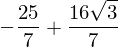

In [25]:
from sympy import *

#nsimplify(6.0714, [pi], tolerance=0.01)
nsimplify(0.38778, [sqrt(3)], tolerance=0.001)

In [1]:
from sympy import *
from IPython.display import display, Math, Latex
init_printing()

alpha = Symbol('\\alpha')
x = Symbol('x')
A = Function('A')(alpha)
dx = Symbol('\\Delta x')
dalpha = Symbol('\\Delta \\alpha')

expr = A*x
display(Math(latex(expr)))

expr = expr.subs([(alpha, alpha + dalpha), (x, x + dx)])
display(Math(latex(expr)))

expr.subs(A, x)

In [6]:
%reload_ext autoreload
%autoreload

from Electromagnetics.Misc import *
from cmath import *

import numpy as np

a = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
a += a*1j

print null(a)

b = null(a)[1]

a.dot(b)

[2, array([[ 0.40824829],
       [-0.81649658],
       [ 0.40824829]])]


array([[ -1.55431223e-15],
       [ -8.88178420e-16],
       [  0.00000000e+00]])

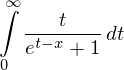

In [7]:
from sympy import *
init_printing()
x, y, z, t = symbols('x y z t')

I = integrate(t/(1+exp(t-x)), (t, 0, oo))

I.simplify()



In [11]:
from sympy import *
from sympy.mpmath import *
init_printing()
mp.dps = 15; mp.pretty = True
print ([legendre(n, 1) for n in range(6)])

nprint([legendre(n, -1) for n in range(6)])


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, -1.0, 1.0, -1.0, 1.0, -1.0]


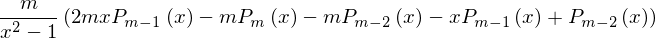

In [6]:
from sympy import *
init_printing()

x, y = symbols('x y')
m, n = symbols('m n')

integrate(legendre(m,x)*legendre(n,x),(x,-1,1))

simplify(diff(simplify((1-x**2)*diff(legendre(m,x), x)), x) + m*(m+1)*legendre(m,x))
# result: 0


In [13]:
from sympy import *
init_printing()

x, y ,z ,t = symbols('x y z t')
k = Symbol('k')
w = Symbol('omega')

f = Function('f')(x,y)
g = f*exp(I*(w*t-k*z))

diff(g, z)

In [7]:
import numpy
import scipy


id = numpy.eye(100)
vals, vecs = scipy.sparse.linalg.eigs(id, k=6)

vals

array([ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j])

In [13]:
from multiprocessing import *

def f(x):
    return x**2.5

if __name__ == '__main__':
    print cpu_count()
    pool = Pool(processes=8)              # start 4 worker processes
    result = pool.apply_async(f, [100])    # evaluate "f(10)" asynchronously
    print result.get(timeout=1)           # prints "100" unless your computer is *very* slow
    print pool.map(f, range(10))          # prints "[0, 1, 4,..., 81]"

8
100000.0
[0.0, 1.0, 5.656854249492381, 15.588457268119896, 32.0, 55.90169943749474, 88.18163074019441, 129.64181424216494, 181.01933598375618, 243.0]


Populating the interactive namespace from numpy and matplotlib


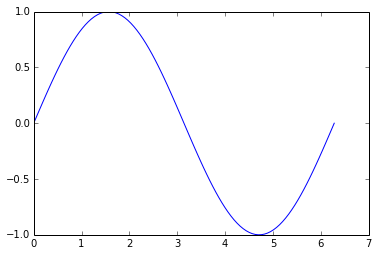

In [10]:
%pylab inline
import numpy as np

x = np.linspace(0,2*pi, 100)
plot(x, sin(x))



Populating the interactive namespace from numpy and matplotlib


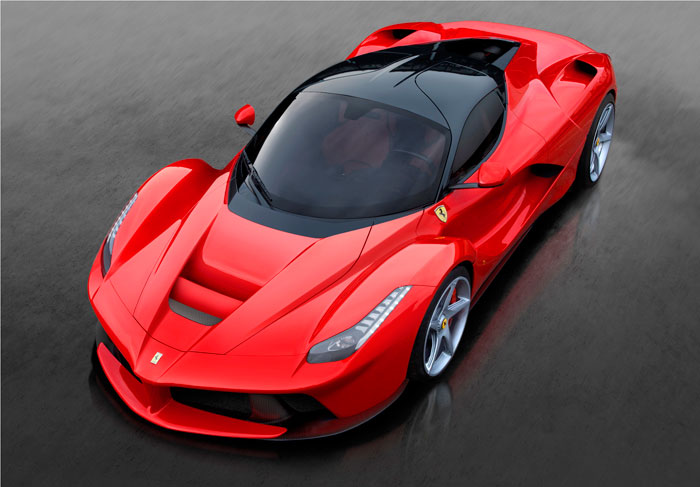

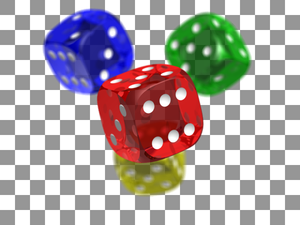

In [11]:
%pylab inline

from IPython.display import Image


img = Image(filename='images/car.jpg')

display(img)

img = Image(filename='images/sample.png')

display(img)

In [4]:
import pandas

#pandas.core.format.set_printoptions(notebook_repr_html=True)

df = pandas.read_csv('data.csv')

df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
1,2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2,2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
3,2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
4,2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
5,2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53


In [2]:
%%file data.csv
Date,Open,High,Low,Close,Volume,Adj Close
2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53

Writing data.csv


In [5]:
from sympy import *
from VectorCalculus import *
init_printing()
from IPython.display import display, Math, Latex

A = Matrix([[ 1, 0, 0,-1, 0,-1], 
            [ 1, 0, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 1, 0],
            [ 0,-1, 0,-1, 1, 0],
            [ 1, 0, 0,-1, 1, 0]])
A = randMatrix(6,6)
display(Math(r'A = '+latex(A)))
b = randMatrix(6,1)
display(Math(r'b = '+latex(b)))

A2, b2, x, cond = solve_linear_system_nontrivial(A, b)

display(Math(r'A = '+latex(A)))
display(Math(r'b = '+latex(b)))
display(Math(r'A2 = '+latex(A2)))
display(Math(r'b2 = '+latex(b2)))
display(Math(r'x = '+latex(x)))
display(Math(r'cond = '+latex(cond)))
display(Math(r'A*x-b = '+latex(A*x-b)))
display(Math(r'A2*x-b2 = '+latex(A2*x-b2)))

display(Math('A^{-1}*b-x = '+latex(A.inv()*b-x)))
display(Math('A2^{-1}*b-x2 = '+latex(A2.inv()*b2-x)))



In [11]:
from sympy import *
import operator
init_printing()


def solve_linear_system_nontrivial(A0, b0, dummy='x'):
    """Finds the non-trivial solution of singular linear systems of equations
    """
    if not isinstance(A0, Matrix):
        raise TypeError("A should be a sympy Matrix")
    if not isinstance(b0, Matrix):
        raise TypeError("b should be a sympy Matrix")
    M, N = A0.rows, A0.cols
    A, b = A0.copy(), b0.copy()
    #lower triangular part
    for i in range(0,min(M,N)):
        if A[i,i]==0:
            for j in range(i+1,M):
                if A[j,i]!=0:
                    A.row_swap(i,j)
                    b.row_swap(i,j)
                    break
        for j in range(i+1,M):
            if A[j,i]!=0:
                P = eye(M)
                P[j,i] = A[j,i]
                P[j,j] = -A[i,i]
                A = P*A
                b = P*b
                #A[j*N] = A[i,i]*A.row(j)-A[j,i]*A.row(i)
                #b[j] = A[i,i]*b[j]-A[j,i]*b[i]
    #upper triangular part
    for i in range(min(M,N)-1,0,-1):
        if A[i,i]!=0:
            for j in range(0,i):
                if A[j,i]!=0:
                    P = eye(M)
                    P[j,i] = A[j,i]
                    P[j,j] = -A[i,i]
                    A = P*A
                    b = P*b
                    #S[j*N] = S[j,i]*S.row(i) - S[i,i]*S.row(j)
                    #A[j*N] = A[i,i]*A.row(j)-A[j,i]*A.row(i)
                    #b[j] = A[i,i]*b[j]-A[j,i]*b[i]
    #zero diagonals
    for i in range(min(M,N)-2,-1,-1):
        if A[i,i]==0:
            for j in range(i+1,min(M,N)):
                if A[j,j]==0:
                    if A[i,j]!=0:
                        A.row_swap(i,j)
                        b.row_swap(i,j)
                        for k in range(0,j):
                            if A[k,j]!=0:
                                A[k*N] = A[j,j]*A.row(k)-A[k,j]*A.row(j)
                                b[k] = A[j,j]*b[k]-A[k,j]*b[j]
                        break
    #solve
    n_dummies = 0;
    Conditions = []    #conditions expr_i==0
    x = zeros(M, 1)    #solution
    nnz = [0]*M    #number of nonzeros in each row
    for i in range(0,M):
        for j in range(0, N):
            if A[i,j]!=0:
                nnz[i]+=1
    nnz_dict = dict(zip(range(0, M), nnz))
    variable_solved = dict(zip(range(0, N), [[False, 0]]*N))
    for (i, v) in sorted(nnz_dict.items(), key=operator.itemgetter(1)):
        if v==0:
            Conditions.append(b[i])
        elif v==1:
            for j in range(0, N):
                if A[i,j]!=0:
                    variable_solved[j] = [True, b[i]/A[i,j]]
                    x[j] = b[i]/A[i,j]
                    break
        else:
            x_not_set = []    #variables not solved yet
            for j in range(0, N):
                if A[i,j]!=0 and variable_solved[j][0]==False:
                    x_not_set.append(j)
            for k in range(1, len(x_not_set)):
                x_dummy_next = dummy + str(n_dummies)    #next dummy variable
                n_dummies += 1
                variable_solved[x_not_set[k]] = [True, Symbol(x_dummy_next)]
                x[x_not_set[k]] = Symbol(x_dummy_next)
            if len(x_not_set)>0:
                x_ind = x_not_set[0]    #the index to solve (x_not_set[i>0] are set to dummies)
                x_val = b[x_ind]    #x_val:the value of the index to solve
                for j in range(0, N):
                    if A[i,j]!=0 and variable_solved[j][0]==True:
                        x_val -= A[i,j]*variable_solved[j][1]
                x_val /= A[i, x_ind]
                variable_solved[x_ind] = [True, x_val]
                x[x_ind] = x_val
    return [A, b, x, Conditions]

from IPython.display import display, Math, Latex
A = Matrix([[ 1, 0, 0,-1, 0,-1], 
            [ 1, 0, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 1, 0],
            [ 0,-1, 0,-1, 1, 0],
            [ 1, 0, 0,-1, 1, 0]])
#A = randMatrix(6)
display(Math(r'A = '+latex(A)))
b = randMatrix(6,1)
display(Math(r'b = '+latex(b)))

A2, b2, x, cond = solve_linear_system_nontrivial(A, b)

display(Math(r'A = '+latex(A)))
display(Math(r'b = '+latex(b)))
display(Math(r'A2 = '+latex(A2)))
display(Math(r'b2 = '+latex(b2)))
display(Math(r'x = '+latex(x)))
display(Math(r'cond = '+latex(cond)))
display(Math(r'A*x-b = '+latex(A*x-b)))
display(Math(r'A2*x-b2 = '+latex(A2*x-b2)))

#display(Math('A^{-1}*b-x = '+latex(A.inv()*b-x)))
#display(Math('A2^{-1}*b-x2 = '+latex(A2.inv()*b2-x)))


## Singular value decomposition (asymmertical circulator)

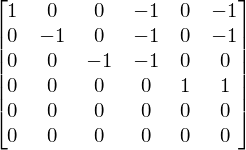

In [1]:
from sympy import *
from VectorCalculus import *
from IPython.display import display, Math, Latex

#x, y, z, u, v, w = symbols('x y z u v w')
init_printing()


m, n, p, q, r, s = symbols('m n p q r s')
C = Matrix([2*m*pi, (2*n+1)*pi, 2*p*pi, (2*q+1)*pi, 2*r*pi, (2*s+1)*pi])
display(Math(r'c=' + latex(C)))

A = Matrix([[ 1, 0, 0,-1, 0,-1], 
            [ 1, 0, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 1, 0],
            [ 0,-1, 0,-1, 1, 0],
            [ 1, 0, 0,-1, 1, 0]])

display(Math(r'A = '+latex(A)))


S, U, V = svd_symbolic(A)

display(Math(r'U = ' + latex(U)))
display(Math(r'V = ' + latex(V)))
display(Math(r'S = ' + latex(S)))
display(Math(r'UAV-S = ' + latex(U*A*V-S)))

SV_x = U*C

display(Math('SV^{-1}x = ' + latex(SV_x)))

p_sub = solve(SV_x[4], p)[0]
q_sub = solve(SV_x[5], q)[0]
display(Math('p = ' + latex(p_sub)))
display(Math('q = ' + latex(q_sub)))

SV_x = simplify(SV_x.subs([(p, p_sub), (q, q_sub)]))
display(Math('SV^{-1}x = ' + latex(SV_x)))

S_inv = zeros(A.rows)
for i in range(0,A.rows):
    if S[i,i]!=0:
        S_inv[i,i] = 1/S[i,i]

x = V*S_inv*SV_x

display(Math('x = ' + latex(x)))

C = simplify(C.subs([(p, p_sub), (q, q_sub)]))
simplify(A*x-C)

U*A